BACKTEST -----------------------
WR: 62.00% | ROI: 11.12% | Drawdown: -6.89%
MedGain: 0.80 | MedLoss: -1.00 | EV: 0.12

REALIDADE -----------------------
WR: 50.08% | ROI: -6.18% | Drawdown: -45.00%
MedGain: 0.87 | MedLoss: -1.00 | EV: -0.06

Profit: -40.14 | Entradas: 649
Dias: 16 (19 totais)


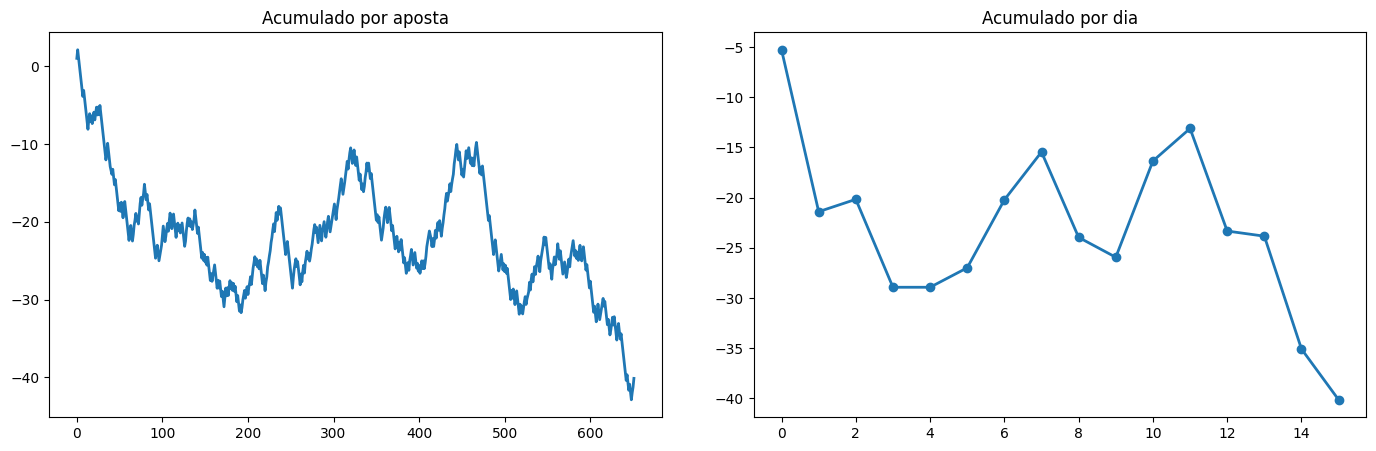


Dias --------------------------------------


,Date,Total_Profit,Odds_H,Acumulado
0,2023-11-23,-5.27,24,-5.27
1,2023-11-24,-16.13,36,-21.40
2,2023-11-25,1.23,69,-20.17
3,2023-11-26,-8.76,41,-28.93
4,2023-11-27,0.00,14,-28.93
5,2023-11-28,1.94,21,-26.99
6,2023-11-30,6.77,35,-20.22
7,2023-12-02,4.77,96,-15.45
8,2023-12-03,-8.51,59,-23.96
9,2023-12-04,-1.98,7,-25.94



Jogos -------------------------------------


,Date,Home,Away,Home_Pts,Away_Pts,Odds_H,Resultado,Profit,Acumulado
0,2023-11-23,Zob Ahan,Kalleh,77,67,2.01,green,1.01,1.01
1,2023-11-23,Memphis,Arkansas,84,79,2.10,green,1.10,2.11
2,2023-11-23,North Carolina,Villanova,81,83,1.71,red,-1.00,1.11
3,2023-11-23,Boston College,Loyola (Ill).,68,71,1.67,red,-1.00,0.11
4,2023-11-23,Unics Kazan,CSKA Moscow,66,79,1.74,red,-1.00,-0.89
5,2023-11-23,Gdynia,Trefl Sopot,72,92,2.38,red,-1.00,-1.89
6,2023-11-23,Libertadores,Astros,94,96,1.60,red,-1.00,-2.89
7,2023-11-23,Pieno Zvaigzdes,Siauliai,76,100,1.63,red,-1.00,-3.89
8,2023-11-23,Virtus Bologna,Fenerbahce,87,79,1.78,green,0.78,-3.11
9,2023-11-23,Nuwaidrad,Al-Hala,94,98,2.19,red,-1.00,-4.11


In [1]:
import pandas as pd; pd.set_option('display.max_columns', None)
import pandas as pd; pd.set_option('display.max_rows', None)
import glob
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import sys
sys.path.append('scripts/')
from Acompanhamento import *
METODO = 'back_home_v2'
TARGET = 'Back_Home'
ODDS = 'Odds_H'
SPREAD = 1
STAKE = 1


# Dados de backtest
wr = 62
roi = 11.12
drawdown = -6.89
med_gain = 0.80
med_loss = -1.00
ev = 0.12
df_all = pd.DataFrame()
dias = glob.glob('apostas_do_dia/*')

for dia in dias:
    dia = dia.split('\\')[1]
    dia = dia.split('.')[0]
    caminho = glob.glob(f'apostas_do_dia/{dia}/*{METODO}*')
    if len(caminho) == 0:
        continue
    caminho = caminho[0]
    df = pd.read_csv(caminho)
    df_all = pd.concat([df_all, df])

temp = pd.read_csv('data/Entire_Season.csv')
df_all = pd.merge(df_all, temp[['Date', 'Home', 'Away', 'Home_Pts', 'Away_Pts']], on=['Date', 'Home', 'Away'], how='left')
df_all = df_all.dropna(subset=['Home_Pts', 'Away_Pts'])
df_all['Home_Pts'] = df_all['Home_Pts'].astype(int)
df_all['Away_Pts'] = df_all['Away_Pts'].astype(int)

df_all.loc[(df_all['Home_Pts'] < df_all['Away_Pts']), TARGET] = 0
df_all.loc[(df_all['Home_Pts'] >= df_all['Away_Pts']), TARGET] = 1

df_all.loc[(df_all[TARGET] == 0), 'Profit'] = - STAKE
df_all.loc[(df_all[TARGET] == 1), 'Profit'] = ((df_all[ODDS] * SPREAD) - 1) * STAKE
df_all['Profit'] = df_all['Profit'].round(2)

print('BACKTEST -----------------------')
print(f'WR: {wr:.2f}% | ROI: {roi:.2f}% | Drawdown: {drawdown:.2f}%')
print(f'MedGain: {med_gain:.2f} | MedLoss: {med_loss:.2f} | EV: {ev:.2f}')

print('\nREALIDADE -----------------------')
df_odds, df_by_day = get_results(df_all, TARGET, ODDS)

print('\nDias --------------------------------------')
display(df_by_day)
print('\nJogos -------------------------------------')
display(df_odds)